# Introduction to Statistics
![Johann_Bernoulli](../Assets/Johann_Bernoulli2.jpg) ![Thomas Bayes](../Assets/thomas_bayes.jpg)

# What is Statistics?
We have an understanding of what data is and that tells us what does the data represent. But, data is not just restricted to representation. It can also be used for inference and interpretation. The job of the statistics is to **infer** meaning from the data.

# How does one infer meaning from data?
To infer meaning from the data we often need a metric about the data (also called a statistic) and based on that metric decisions are made and understanding is developed. Pretty simple right?

## Here's an example
Let's say you want to install a new reflective mirror near a curved road. You can only install this reflective mirror if the ***average*** number of accidents per week increase a certain number. If you have a dataset of accidents per week, you can calculate the average value (this is the statistic) and you can decide to install the reflective mirror (this is the decision). 

# Helper Functions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy
from scipy.stats import binom, skewnorm

marks_file = '../Datasets/subjects_and_marks.csv'
marks_df = pd.read_csv(marks_file)

skewed_data_file = '../Datasets/skewed_samples.csv'
skewed_df = pd.read_csv(skewed_data_file)

def min_max_transform(x, new_min, new_max):
    curr_min = np.min(x)
    curr_max = np.max(x)
    x = [(sample - curr_min)/(curr_max - curr_min) for sample in x]
    x = [sample*(new_max - new_min) for sample in x]
    x = [sample+new_min for sample in x]
    return x

def random_distribution(shapex, max_value):
    dist = [random.randrange(0, 100) for i in range(0, shapex)]
    return dist

def normal_distribution(shapex, mean_value, std=None):
    if not std:
        std = 0.25
    std = std * mean_value
    dist = [random.normalvariate(mean_value, std) for i in  range(0, shapex)]
    return dist

def skewed_distribution(shapex, 
                        transform=False, 
                        transform_range=(), 
                        skew_type='left'):
    dist = skewnorm.pdf(range(1, shapex+1), 2)
    if transform:
        curr_min = np.min(dist)
        curr_max = np.max(dist)
        new_min = transform_range[0]
        new_max = transform_range[1]
        dist = [min_max_transform(x, curr_min, curr_max, new_min, new_max) for x in dist]
    return dist

def get_distribution(x, y, nature):
    shapex = len(x)
    if nature == 'equal':
        return [y for i in range(0, shapex)]
    if nature == 'random':
        return random_distribution(shapex, y)
    if nature == 'normal':
        return normal_distribution(shapex, y)

def plot_histogram(bins, 
                   y,
                  xlabel=None,
                  ylabel=None,
                  title=None,
                  color=None):
    fig, axs = plt.subplots(figsize=(16, 6))
    axs.set(xticks=bins)
    axs.hist(y, bins=bins, color=color)
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_title(title)
    return axs

def plot_barplot(x,
                y,
                xlabel=None,
                ylabel=None,
                title=None,
                barcolors=None):
    fig, axs = plt.subplots(figsize=(16, 6))
    axs.bar(x, y, color=barcolors)
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_title(title)

# Distribution of Data
Distribution of data tells us how values in a particular set of data are distributed. Let's look at an exmaple below.

In [2]:
NUM_STUDENTS = 50
roll_numbers = [str(i) for i in range(1, NUM_STUDENTS+1)]

## Equal Distribution

Text(0.5, 1.0, 'Equal Distribution of Marks')

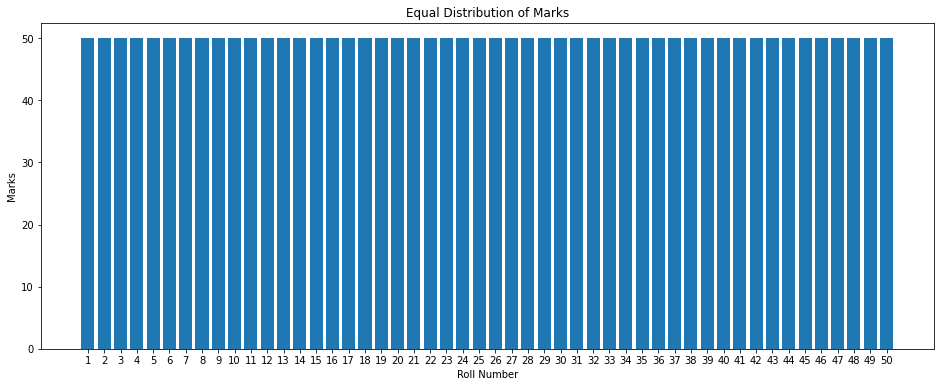

In [3]:
MARKS = 50
all_equal_marks = get_distribution(roll_numbers, MARKS, nature='equal')

fig, axs = plt.subplots(figsize=(16, 6))
axs.bar(roll_numbers, all_equal_marks)
axs.set_ylabel('Marks')
axs.set_xlabel('Roll Number')
axs.set_title('Equal Distribution of Marks')

## Random Distribution
In a real world scenario not everyone scores the same marks.

Text(0.5, 1.0, 'Random Distribution of Marks')

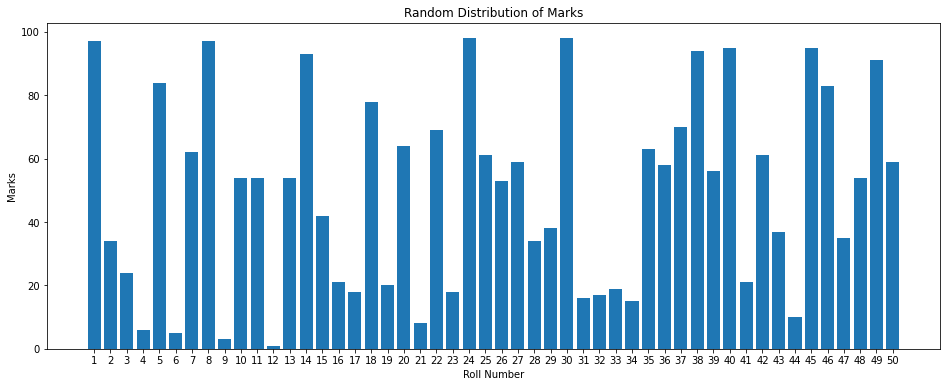

In [4]:
NUM_STUDENTS = 50
roll_numbers = [str(i) for i in range(1, NUM_STUDENTS+1)]
MAX_MARKS = 100
randomly_distributed = get_distribution(roll_numbers, MAX_MARKS, nature='random')

fig, axs = plt.subplots(figsize=(16, 6))
axs.bar(roll_numbers, randomly_distributed)
axs.set_ylabel('Marks')
axs.set_xlabel('Roll Number')
axs.set_title('Random Distribution of Marks')

## Histogram Representation

Text(0.5, 1.0, 'Random Distribution of Marks')

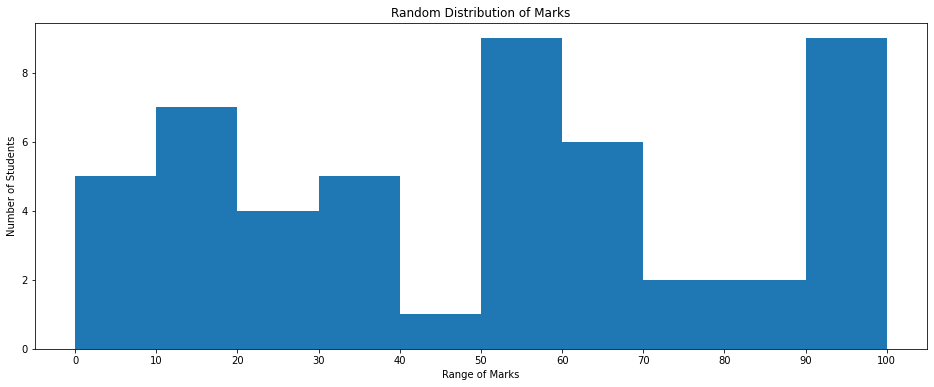

In [5]:
fig, axs = plt.subplots(figsize=(16, 6))
bins = range(0,101,10)
axs.set(xticks=bins)
axs.hist(randomly_distributed, bins=bins)
axs.set_xlabel('Range of Marks')
axs.set_ylabel('Number of Students')
axs.set_title('Random Distribution of Marks')

## Normal Distribution

Text(0.5, 1.0, 'Normal Distribution of Marks')

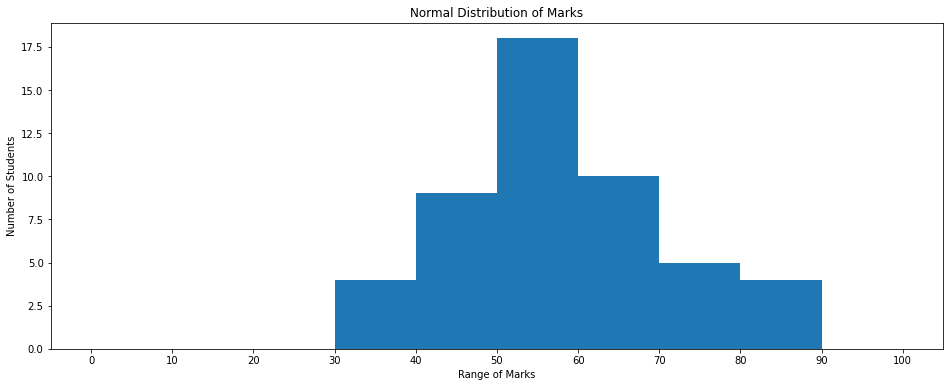

In [6]:
NUM_STUDENTS = 50
roll_numbers = [str(i) for i in range(1, NUM_STUDENTS+1)]
MEAN_MARKS = 60
normaly_distributed = get_distribution(roll_numbers, MEAN_MARKS, nature='normal')

fig, axs = plt.subplots(figsize=(16, 6))
bins = range(0,101,10)
axs.set(xticks=bins)
axs.hist(normaly_distributed, bins=bins)
axs.set_xlabel('Range of Marks')
axs.set_ylabel('Number of Students')
axs.set_title('Normal Distribution of Marks')

# Mean/Average
$$\bar{X} = \sum_{i}^{} \frac{X_{i}}{n}$$
Average or Mean is a measure of a central tendency of a distribution. Mean value tells us the value around which a distribution of data is centered.

In [7]:
marks_df.head()

,Unnamed: 0,English,Maths,Physics,Roll Number
0,0,86.688183,26.536127,57.155411,1
1,1,76.067957,56.544003,52.485270,2
2,2,63.602437,55.276641,32.280471,3
3,3,52.756993,46.505520,54.959339,4
4,4,66.083731,59.973554,21.075426,5


## Distribution of Individual Subject Marks

<AxesSubplot:title={'center':'Score in English'}, xlabel='Range of Marks', ylabel='Number of Students'>

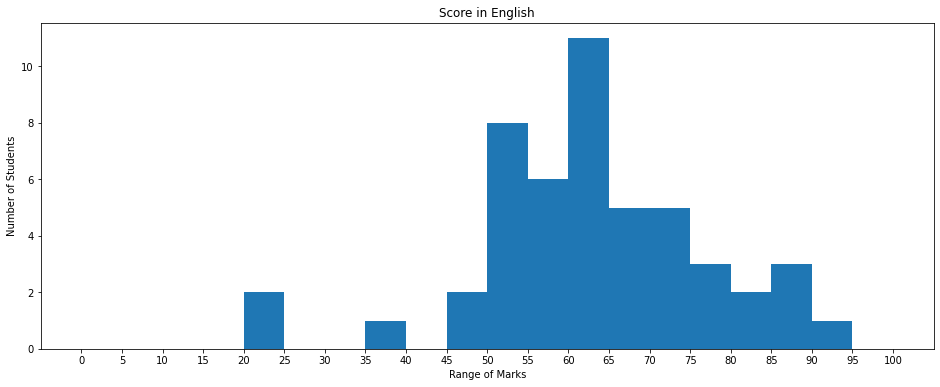

In [8]:
bins = range(0, 101, 5)
plot_histogram(
    bins,
    marks_df['English'].values,
    xlabel='Range of Marks',
    ylabel='Number of Students',
    title='Score in English'
)

<AxesSubplot:title={'center':'Score in Maths'}, xlabel='Range of Marks', ylabel='Number of Students'>

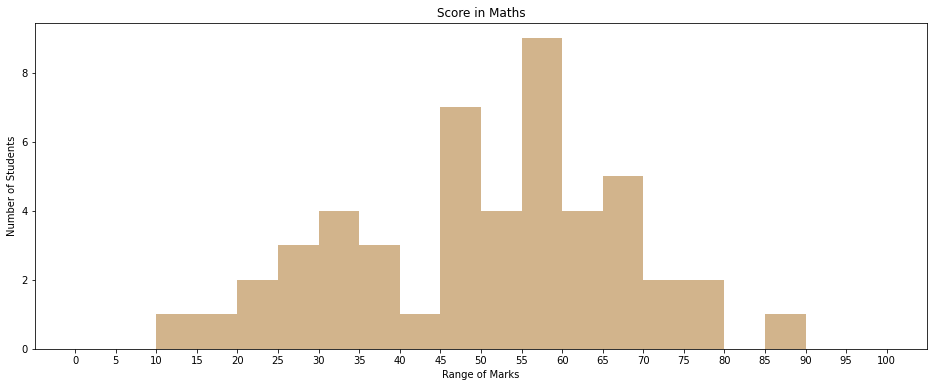

In [9]:
plot_histogram(
    bins,
    marks_df['Maths'].values,
    xlabel='Range of Marks',
    ylabel='Number of Students',
    title='Score in Maths',
    color='tan'
)

<AxesSubplot:title={'center':'Score in Physics'}, xlabel='Range of Marks', ylabel='Number of Students'>

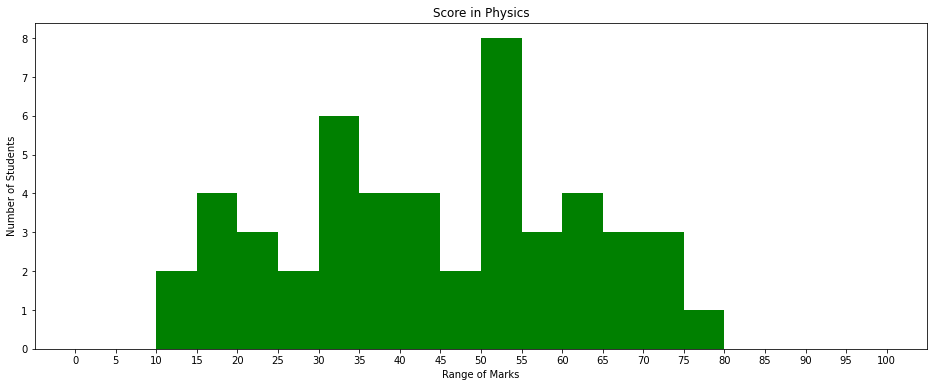

In [10]:
plot_histogram(
    bins,
    marks_df['Physics'].values,
    xlabel='Range of Marks',
    ylabel='Number of Students',
    title='Score in Physics',
    color='green'
)

## Averages of Individual Subjects

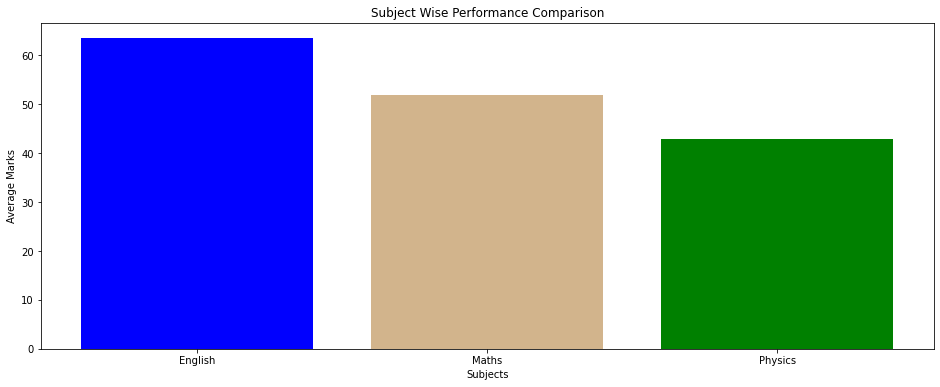

In [11]:
subjects = ['English', 'Maths', 'Physics']
subject_averages = [marks_df[subject].mean() for subject in subjects]

plot_barplot(subjects,
            subject_averages,
            xlabel='Subjects',
            ylabel='Average Marks',
            title='Subject Wise Performance Comparison',
            barcolors=['blue', 'tan', 'green'])

# Median/Middle Value

## Skewed Distributions

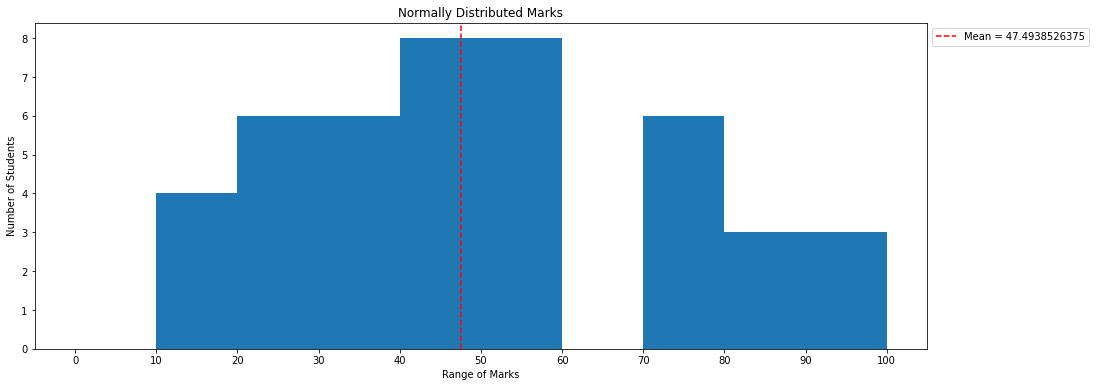

In [12]:
normal_dist = skewed_df['Normaly Distributed'].values
normal_dist_mean = skewed_df['Normaly Distributed'].mean()
axs = plot_histogram(range(0, 101, 10),
                    normal_dist,
                    xlabel='Range of Marks',
                    ylabel='Number of Students',
                    title='Normally Distributed Marks'
                    )
axs.axvline(x=normal_dist_mean, 
            color='red', 
            linestyle='dashed', 
            label=f'Mean = {normal_dist_mean}')
axs.legend(loc='upper left', bbox_to_anchor=(1, 1))

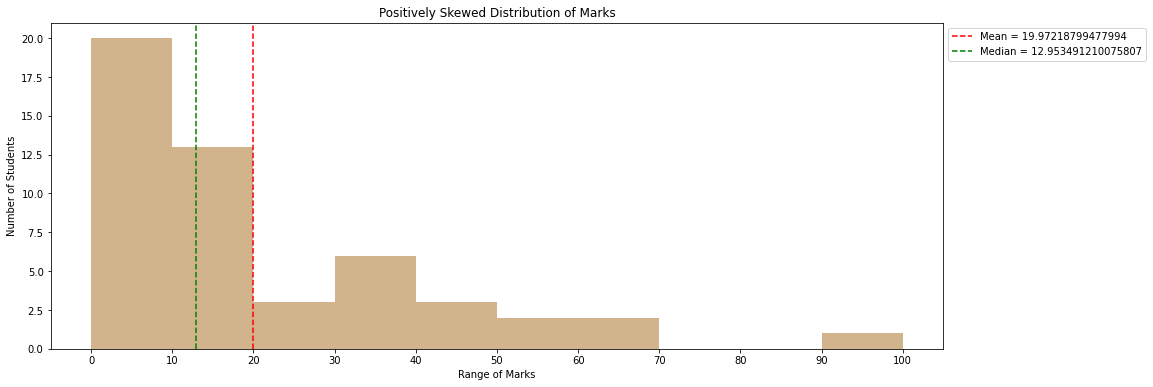

In [14]:
left_skewed_dist = skewed_df['Positively Skewed'].values
left_skewed_dist_mean = skewed_df['Positively Skewed'].mean()
left_skewed_dist_median = skewed_df['Positively Skewed'].median()

# Plot Distribution
axs = plot_histogram(range(0, 101, 10),
                    left_skewed_dist,
                    xlabel='Range of Marks',
                    ylabel='Number of Students',
                    title='Positively Skewed Distribution of Marks',
                    color='tan'
                    )

# Add mean line
axs.axvline(x=left_skewed_dist_mean, 
            color='red', 
            linestyle='dashed', 
            label=f'Mean = {left_skewed_dist_mean}')
# Add median line
axs.axvline(x=left_skewed_dist_median,
           color='green',
           linestyle='dashed',
           label=f'Median = {left_skewed_dist_median}')
axs.legend(loc='upper left', bbox_to_anchor=(1, 1))

## How to calculate Median?
- Sort the values of the distribution.
- Find the middle value, that is the **Median**

# Standard Deviation/Spread
Mean and Median give us an idea about how a distribution is centered and Standard Deviation tells us how the data is spread out.

Technically Normal Distribution is a function of Mean $\mu$ and Standard Deviation $\sigma$.

$f(\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma}} e^{\frac{-(x-\mu)^2}{2\sigma}}$

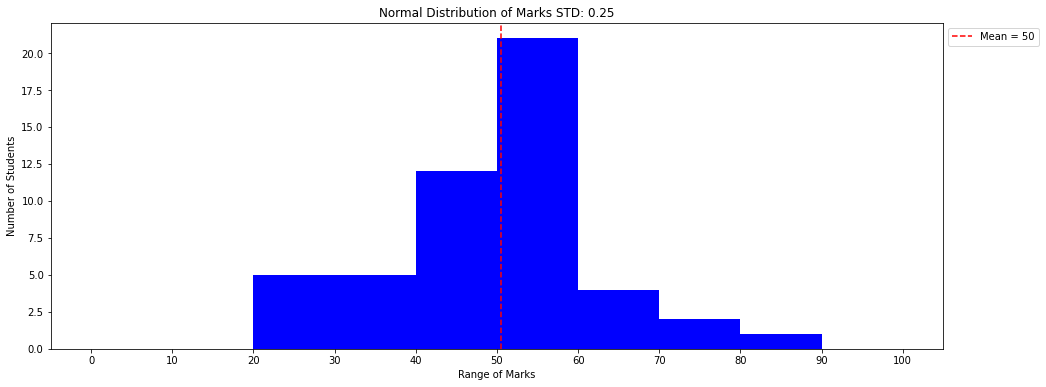

In [15]:
standard_deviation = 0.25 # % of Mean
mean = 50
distribution = normal_distribution(50, mean, standard_deviation)
distribution_mean = np.mean(distribution)

axs = plot_histogram(range(0, 101, 10),
                    distribution,
                    xlabel='Range of Marks',
                    ylabel='Number of Students',
                    title=f'Normal Distribution of Marks STD: {standard_deviation}',
                    color='blue'
                    )
axs.axvline(x=distribution_mean, 
            color='red', 
            linestyle='dashed', 
            label=f'Mean = {mean}')
axs.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Quantiles, Percentiles and Outliers

![Sample Boxplot](../Assets/boxplot.png)

A box plot is a plot used to represent the quantile distribution of data.

The median value is marked as the second quantile **Q2** -> Median represents **50th Percentile**
   - This means that 50% of the data available in the distribution is < median value.

**Q1** marks the **25th percentile** of the data.

    - This means that 25% of the data is less than the Q1 value.

**Q3** marks the **75th percentile** of the data.

    - This means that 75% of the data is less than the Q3 value.

**Interquantile Range (IQR)** is given as $Q3 - Q1$

**Maximum Value** is given as $Q3 + 1.5 * (IQR)$ *not to be confused with actual maximum value of the entire distribution*

**Minimum Value** is given as $Q1 - 1.5 * (IQR)$ *not to be confused with actual minimum value of the entire distribution*

**Outliers** Are all values > Maximum value or < Minimum value

## Boxplot of Max Scores

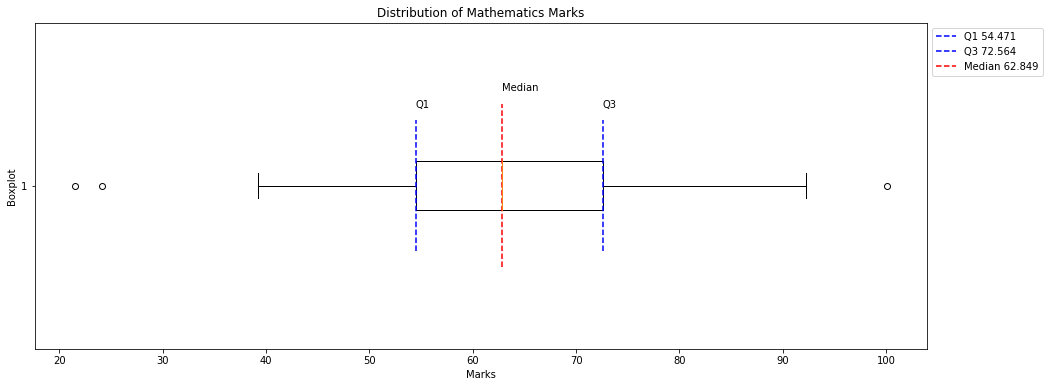

In [17]:
# Calculate Quartiles
scores = marks_df['English'].values
median = np.median(scores)
q1 = np.percentile(scores, 25)
q3 = np.percentile(scores, 75)
iqr = q3-q1
_min = q1 - (1.5*iqr)
_max = q3 + (1.5*iqr)

# Plot Box Plot
fig, axs = plt.subplots(figsize=(16, 6))
axs.boxplot(scores, vert=False)
axs.set_title('Distribution of Mathematics Marks')
axs.set_xlabel('Marks')
axs.set_ylabel('Boxplot')

# Show Quartiles
axs.axvline(x=q1,
           color='blue',
           linestyle='dashed',
           label=f'Q1 {np.round(q1, 3)}',
           ymin=0.3,
           ymax=0.7)

axs.text(q1,
        1.25,
        'Q1',
        verticalalignment='center')

axs.axvline(x=q3,
           color='blue',
           linestyle='dashed',
           label=f'Q3 {np.round(q3, 3)}',
           ymin=0.3,
           ymax=0.7)

axs.text(q3,
        1.25,
        'Q3',
        verticalalignment='center')

# Show Median
axs.axvline(x=median,
           color='red',
           linestyle='dashed',
           label=f'Median {np.round((median), 3)}',
           ymin=0.25,
           ymax=0.75)

axs.text(median,
        1.3,
        'Median',
        verticalalignment='center')

axs.legend(bbox_to_anchor=(1,1), loc='upper left')